In [1]:
%matplotlib notebook

In [2]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

## 3D Surface plot
### Profile plane
First we define the profile plane using the parameters
a: amplitude, w: wavelength, b1: amplitude box fold, b2: amplitude parasitic fold, c: shift parasitic fold, s: shear (inclination of axial plane before setting plunge and plunge direction)

In [3]:
a = 2
w = 10
b1 = 1
b2 = 0.0
b3 = 0
c = 0

In [4]:
x = np.linspace(-5.5, 5.5, num=111)
z = a * b1 * np.sin(2 * np.pi * x / w) + a * b2 * np.sin(6 * np.pi * x / w) + a * b3 * np.sin(10 * np.pi * x / w + c)

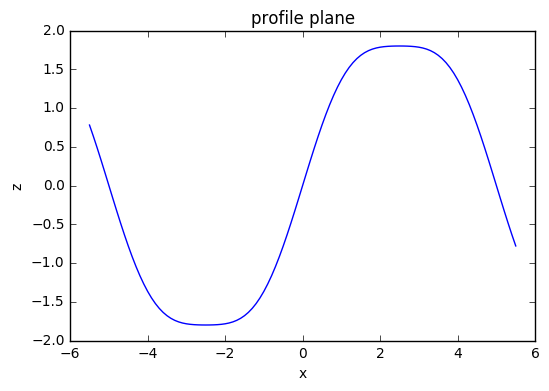

In [5]:
plt.plot(x, z)
plt.xlabel('x')
plt.ylabel('z')
plt.title('profile plane');

### 3D surface 
Now we can extrude along y-axis  to get a folded 3D surface and add some noise (controlled by value of f)

In [6]:
y = np.linspace(-5.5, 5.5, num=111)
zz = np.tile(z, (111, 1))
xx = np.tile(x, (111, 1))
yy = np.tile(y, (111, 1))
yy = np.transpose(yy)

f = 0.001

noise = np.multiply(f * 2, np.random.rand(111, 111) - 0.5)
zz = zz + np.multiply(noise, zz)

Now we shear the whole folded surface parallel to the x-axis. Parameter s defines the amount of shear

In [7]:
s = -0.6
dxx = np.multiply(s, zz)
xx = xx + dxx

we reduce the number of points for clarity

In [8]:
n = 4
xx = xx[1:111:n, 1:111:n]
yy = yy[1:111:n, 1:111:n]
zz = zz[1:111:n, 1:111:n]

(-6.0, 6.0, -6.0, 6.0)

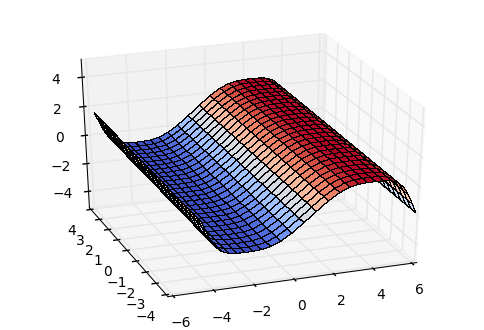

In [9]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.view_init(elev=50., azim=-110)
surf = ax.plot_surface(xx, yy, zz,  rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0.01, 
                       antialiased=False,  zorder=1)
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-5, 5)
ax.axis('equal')

### Vectors
let's calculate the vectors that are orthogonal to the folded surface every other point

In [1]:
n = 2
dxx=xx[1:len(xx)-1:n, 1:len(xx)-1:n] - xx[2:len(xx):n, 1:len(xx)-1:n]
dxy=yy[1:len(xx)-1:n, 1:len(xx)-1:n] - yy[2:len(xx):n, 1:len(xx)-1:n]
dxz=zz[1:len(xx)-1:n, 1:len(xx)-1:n] - zz[2:len(xx):n, 1:len(xx)-1:n]

dyx=xx[1:len(xx)-1:n, 1:len(xx)-1:n] - xx[1:len(xx)-1:n, 2:len(xx):n]
dyy=yy[1:len(xx)-1:n, 1:len(xx)-1:n] - yy[1:len(xx)-1:n, 2:len(xx):n]
dyz=zz[1:len(xx)-1:n, 1:len(xx)-1:n] - zz[1:len(xx)-1:n, 2:len(xx):n]

xv = xx[1:len(xx)-1:n, 1:len(xx)-1:n]
yv = yy[1:len(xx)-1:n, 1:len(xx)-1:n]
zv = zz[1:len(xx)-1:n, 1:len(xx)-1:n]

for i in range(0,len(xv[1,:])):
       for j in range(0,len(xv[1,:])):
              vx = np.matrix((dxx[i,j], dxy[i,j],dxz[i,j]))
              vy = np.matrix((dyx[i, j], dyy[i, j], dyz[i, j]))
              vector = np.cross(vx,vy,axis=1)
              vector_norm = np.sqrt(vector[0, 0] ** 2 + vector[0, 1] ** 2 + vector[0, 2] ** 2)
              vector[0, 0] = vector[0, 0] / vector_norm
              vector[0, 1] = vector[0, 1] / vector_norm
              vector[0, 2] = vector[0, 2] / vector_norm
              if (i == 0) & (j == 0):
                     vectorlist = vector
              else:
                     vectorlist = np.concatenate((vectorlist,vector), axis=0)

U1 = vectorlist[:,0]
U = np.reshape(U1,xv.shape)

V1 = vectorlist[:,1]
V = np.reshape(V1,xv.shape)

W1 = vectorlist[:,2]
W = np.reshape(W1,xv.shape)
               
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.view_init(elev=50., azim=-110)
surf = ax.plot_surface(xx, yy, zz,  rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0.01, 
                       antialiased=False,  zorder=1)
ax.quiver(xv, yv, zv, U, V, W, color='black',zorder=1000)
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-5, 5)
xLabel = ax.set_xlabel('x')
yLabel = ax.set_ylabel('y')
zLabel = ax.set_zlabel('z')
ax.axis('equal')

NameError: name 'xx' is not defined

### Rotation of objects
The fold now has specified shape of profile plane, inclination of axial plane and the orthogonal vectors. Now let's rotate the whole fold train according to plunge pl and plunge direction pd of the fold axis

(-8.0, 8.0, -8.0, 8.0)

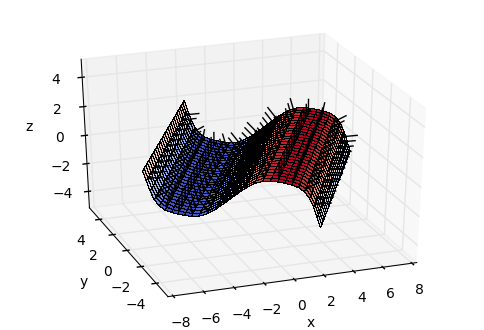

In [11]:
pd = 40
pl = 0

# rotate along x axis (plunge)
theta = pl * np.pi / 180
rotx = np.matrix(([1, 0, 0], [0, np.cos(theta), -1 * np.sin(theta)], [0, np.sin(theta), np.cos(theta)]))

# rotate along z (plunge direction)
theta = pd * np.pi / 180
rotz = np.matrix(([np.cos(theta), -1 * np.sin(theta), 0], [np.sin(theta), np.cos(theta), 0], [0, 0, 1]))

for i in range(0, len(xx)):
     for j in range(0, len(xx)):
            u = np.matrix((xx[i,j], yy[i,j], zz[i,j]))
            rotu = u * rotx
            rotu = rotu * rotz
            xx[i, j] = rotu[0, 0]
            yy[i, j] = rotu[0, 1]
            zz[i,j]=rotu[0,2]

for i in range(0,len(U1)):
       vectors = np.matrix((U1[i], V1[i],W1[i]))
       rotated_vectors = vectors * rotx
       rotated_vectors = rotated_vectors * rotz
       U1[i] = rotated_vectors[0,0]
       V1[i] = rotated_vectors[0,1]
       W1[i] = rotated_vectors[0,2]

U = np.reshape(U1,xv.shape)
V = np.reshape(V1,xv.shape)
W = np.reshape(W1,xv.shape)            

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.view_init(elev=50., azim=-110)
surf = ax.plot_surface(xx, yy, zz,  rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0.01, 
                       antialiased=False,  zorder=1)
ax.quiver(xv, yv, zv, U, V, W, color='black',zorder=1000)
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-5, 5)
xLabel = ax.set_xlabel('x')
yLabel = ax.set_ylabel('y')
zLabel = ax.set_zlabel('z')
ax.axis('equal')

## Stereonet plot

### Create canvas